<a href="https://colab.research.google.com/github/XIOZ119/colab/blob/main/smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

생성된 데이터: Counter({0: 9900, 1: 100})


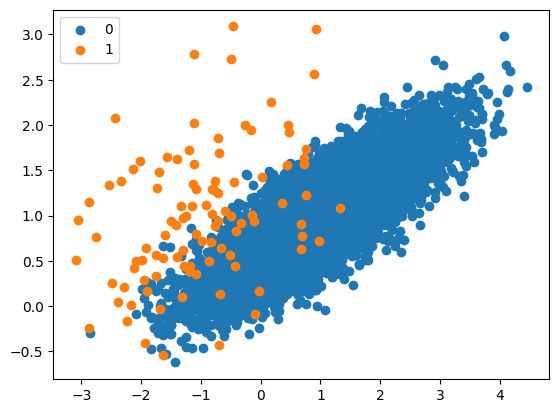

SMOTE를 기반으로 한 오버샘플링된 데이터: Counter({0: 9900, 1: 990})


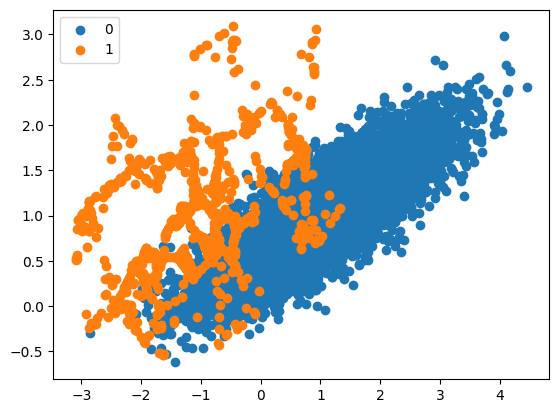

In [4]:
# 필요한 라이브러리를 가져옵니다.
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

# make_classification() 함수: redundant features의 수 및 weights(클래스에 할당된 샘플의 비율) 설정
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# 각 클래스 레이블의 발생 빈도를 계산합니다.
counter = Counter(y)
print('생성된 데이터: %s' % counter)

# 생성된 데이터를 시각화합니다.
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# 샘플링 전략: 리샘플링 후 소수 클래스 샘플 수 / 다수 클래스 샘플 수
over = SMOTE(sampling_strategy=0.1)
X, y = over.fit_resample(X, y)

# SMOTE를 기반으로 한 오버샘플링된 데이터의 발생 빈도를 계산합니다.
counter = Counter(y)
print('SMOTE를 기반으로 한 오버샘플링된 데이터: %s' % counter)

# 오버샘플링된 데이터를 시각화합니다.
for label, _ in counter.items():
    row_ix = where(y==label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()
